In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_EURUSD.csv")

In [3]:
def kama(df, col, n):
    df_copy = df.copy()
    df_copy[f"kama_{n}"] = ta.momentum.KAMAIndicator(df_copy["close"], n).kama()
    return df_copy

<AxesSubplot:>

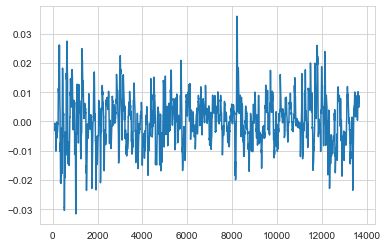

In [10]:
df = kama(df, "close", 10)
df = kama(df, "close", 100)
df["kama_diff"] = df["kama_100"] - df["kama_10"]
df["kama_trend"] = -1
df.loc[df["kama_diff"]<0, "kama_trend"] = 1

df["kama_diff"].plot()
#df["kama_trend"].plot()

In [11]:
def kama_market_regime(df, col, n, m):
    """
    Calculates the Kaufman's Adaptive Moving Average (KAMA) to determine market regime.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame containing price data or other numeric series.
    - col (str): The column name in the DataFrame to apply KAMA.
    - n (int): The period length for the first KAMA calculation.
    - m (int): The period length for the second KAMA calculation.

    Returns:
    - pd.DataFrame: DataFrame with additional columns "kama_diff" and "kama_trend" indicating the market trend.
    """
    
    df_copy = df.copy()
    df_copy = kama(df_copy, col, n)
    df_copy = kama(df_copy, col, m)
    
    df_copy["kama_diff"] = df_copy[f"kama_{m}"] - df_copy[f"kama_{n}"]
    df_copy["kama_trend"] = -1
    df_copy.loc[0<df["kama_diff"], "kama_trend"] = 1
    
    return df_copy


<AxesSubplot:>

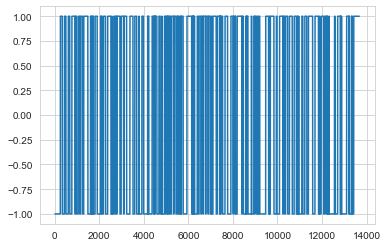

In [12]:
df = kama_market_regime(df, "close", 20, 200)
df["kama_trend"].plot()